# Lab 1 - Exploring Electric Fields and Electric Potentials
Version: January 2020

## Quick math review

An Electric Field $\vec{E}(\vec{p})$ assigns a *vector* to each point $\vec{p}$ in space.  If you pick a Cartesian coordinate system for example, then:

$$\vec{E}(x,y,z)=\left(E_x(x,y,z),\;E_y(x,y,z),\;E_z(x,y,z)\right)$$

Of course, if your system happens to be two-dimensional, then you can omit the z coordinate and you'll have:

$$\vec{E}(x,y)=\left(E_x(x,y),\;E_y(x,y)\right)$$

Rather simpler is the idea of a scalar field, which assigns to each point in space a single value (essentially, a scalar field is a function):

$$ V(\vec{p}) = V(x,y,z) \;\;\;\text{(cartesian coordinates)} $$

The *electric potential*, which you may not have studied yet in lecture (but which we can easily give you the tools to visualize with Python without yet knowing the detailed physics), is such a scalar field, and it turns out to have a beautiful relationship with electric fields:

$$ \vec{E}(\vec{p}) = -\nabla V(\vec{p})\;\;=-\left(\frac{\partial V}{\partial x},\;\frac{\partial V}{\partial y},\;\frac{\partial V}{\partial z}\right) = -\hat{\boldsymbol{i}}\frac{\partial V}{\partial x}-\hat{\boldsymbol{j}}\frac{\partial V}{\partial y}-\hat{\boldsymbol{k}}\frac{\partial V}{\partial z}$$

Where the $\nabla$ symbol denotes the operation of the *gradient*.

The easiest way to think about a scalar field is to think of the two dimensional situation $V(x,y)$ where the function V of (x,y) is a surface or "landscape", where each point (x,y) has some "height" associated with it.  Points where the scalar field has a greater value are "higher up" than points where it has a lower value, and since (for physics) we require that the field changes smoothly anywhere there are no charges, it may tend to look rather like hills and valleys.  

If you think of hiking in the mountains, if you hike along a path of equal elevation, you will go neither up nor down -- in essence that will be following a **contour** on the landscape, and likewise we can visualize contours of scalar fields -- lines which connect points where the field has an equal value.

The negative gradient turns out to have a nice meaning in this metaphor.  If you happen to be carrying a soccer ball with you as you hike in the mountains, then if you drop the ball it will roll down the hill along the line of *steepest descent*.  In essence, the net force it will feel is a vector that points in the steepest direction down the hill, and that turns out to be precisely what the negative gradient of a scalar field will give you!



In [255]:
# Standard packages we always use
import numpy as np
import matplotlib.pyplot as p
# To create 3D visualizations we'll use Axes3D like so:
from mpl_toolkits.mplot3d import Axes3D

#For Big Plots
def bigplot():
    p.figure(dpi=200)


In [256]:
#
# mgrid  setups up two 2D arrays that each 
# simply contain coordinate values from the starting value 
# to the stopping value specified.
# These arrays of coordinate values are necessary to 
# plot a surface (2D function)
# or vectors or contours.
#
#   numpy.mgrid[ xstart:xend:xstep,  ystart:yend:ystep]
#
#  We add a very small increment to the final array so that no points in the grid
# will cause division by zero if a charge happens to be exactly on a grid point.

x, y = np.mgrid[-60:61:2., -60:61:2.] + 0.0000001



In [257]:
#Define a new class (DATA TYPE) called "PointCharge" which can
#contain three different attributes:  x and y coordinates, and 
#a value for charge.
#
############## A NEW CLASS (data type)##################
# This definition tells Python how to handle
# this data type. 
# A CLASS DEFINITION (below) is a TEMPLATE FOR A NEW DATATYPE
# that is composed of SEVERAL PIECES OF DATA ALL KEPT TOGETHER
# UNDER ONE "ROOF".  Classes can also have functions
# that belong to them and operate on the data they contain!  
# THIS IS A VERY USEFUL WAY TO ORGANIZE DATA AND COD.
#
# The definition below tells Python what this new
# datatype is called and what kinds of information 
# it will contain.
#
# After we define it
# we will be able to make new variables of this "kind"
# because Python will know how to deal with them.
class PointCharge:
    #We tell python that every variable of type "PointCharge"
    # will contain three numbers: q, x, and y.
    # And that if we do not explicitly set those values,
    # they will default to zero! 
    q = 0.
    x = 0.
    y = 0.

In [258]:

######################################################    
# Now a new data type is available to use.  We
# can now use that template to create actual new
# variables that can store position and charge
# all "under one roof"
Q1 = PointCharge()
Q2 = PointCharge()
Q3 = PointCharge()
Q4 = PointCharge()
######################################################

# We now have 3 charges created, Q1, Q2, and Q3.

# *************
# You can even create a LIST of POINTCHARGES and 
# use a loop to scroll through the list!  This is
# very good for handling large amounts of data
# when you can't explicitly name every piece of data.
# ****************


In [259]:
# Now that the Point Charge variables exist we must 
# fill in each charge with actual location and charge values
# to calculate things with.

chargeList = [] # List of charges
for i in range(10):
    chargeList.append(PointCharge()) # Add 10 new point charges
    
for charge in chargeList: # Make values for each charge
    charge.q = np.random.randn()
    charge.x = np.random.randn()*30
    charge.y = np.random.randn()*30
    print(charge.x)

#  YOU CAN ADD AS MANY AS YOU LIKE!!

# ADVICE:  DO NOT SET DATA 'BY HAND' (AS ABOVE) UNLESS YOU HAVE VERY FEW CHARGES.
# INSTEAD, CREATE A LOOP AND A PROGRAM TO GENERATE A LIST OF CHARGES
# AND SET THE POSITIONS AND VALUES AUTOMATICALLY USING A FUNCTION OR PATTERN
# APPROPRIATE TO THE CHARGE CONFIGURATION YOU ARE EXAMINING.


-20.920878218253037
12.47914585547273
-8.25859649907834
49.922908717773424
15.195198381303513
-0.6521352619034533
-13.026214573509067
18.484435510672398
3.3645196214709916
-5.633637993025409


## 1.  Your first goal: create a custom charge configuration

Alter the code above to create a set of charges (must be more than three) that you'd like to study today.  You can get as fancy as you like.  We will be calculating the field and potential produced by your charges.

### DOCUMENT YOUR PURPOSE AND WHAT YOU ARE DOING

**Today's lab is solely in the form of an Jupyter Notebook.  You should create new cells and change their type to "markdown" and type in descriptions of what you are doing today.**



## 2. Calculate the potential (scalar field) 

Calculate the electric potential V(x,y) that results from your charge configuration.  This means putting your charges into a list and using the for-loop below.

In [260]:
# Calculate the field from our points charges

#The easiest way to do this is to turn the point charges into a list.
chargelist = chargeList

#Now we can use  "For Loop"  (remember those?) to scroll through the list and add things up.

V = 0*x + 0*y  #Initially we start with a zero field.
#   NOW LOOP THROUGH THE LIST 
# (" for each charge in the list... do this calculation")
for charge in chargelist:
    V = V + charge.q / np.sqrt((charge.x-x)**2 + (charge.y-y)**2)
    

## 3. Plot contours of the field

Below we use the "contour" command to plot equal-value contours of the field.

**Notice that we have defined custom contour values**.  This specifies exactly which potentials get plotted as contours!  

If you find that your coordinate grid is too grainy to get smooth potentials, you should make a better or finer coordinate grid.  Likewise if the potentials defined below do not work you will have to change them in order to come up with a contour plot that accurately and completely shows the shape of your Electric potential.

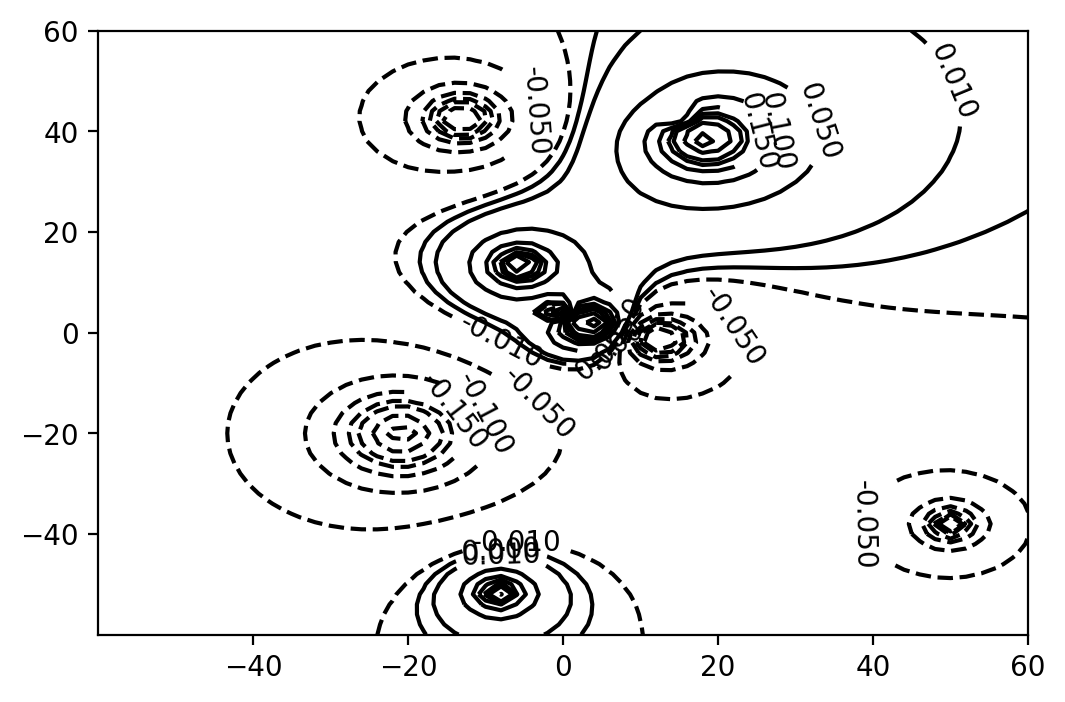

In [261]:
# the contour command creates a contour plot.  We specify 
#  that we are using our x and y coordinate system, the values V of the field,
# and we want custom-defined contour levels:

n=1 # Change n to change resolution of contour plot
levels = [-1*10**n,-1*10**(n-1),-4*10**(n-2),-2.5*10**(n-2),-2*10**(n-2),-1.5*10**(n-2),-1*10**(n-2),
          -5*10**(n-3),-1*10**(n-3),0,1*10**(n-3),5*10**(n-3),1*10**(n-2),1.5*10**(n-2),2*10**(n-2),
          2.5*10**(n-2),4*10**(n-2),1*10**(n-1),1*10**n]

bigplot()  #Make a big plot
mycontours = p.contour(x,y,V, levels, colors='k')  # 'k' makes it all black. Other colors annoy.

# Contours are not much good unless you label them.  
# the following statement labels them:
p.clabel(mycontours)

# Now show it.
p.show()

## 4. Plot the Electric Field

Let's obtain a vector field which is the negative gradient of the scalar field we've already calculated.

In [262]:
# It is as simple as this.
Ex, Ey = np.gradient(V)
# We take the negative separately since NumPy doesn't like to do it with the gradient statement all at once.
Ex = -Ex
Ey = -Ey


In [263]:
Ex.max()

1.5654219878152213

In [264]:
Ey.max()

1.5649599250761463

##  Mask out certain vectors so they are not plotted!

**Why would we ever do that??**

Near to your charges, the electric field becomes very large.  The field vectors would become far longer than any other vectors on the plot, and you would see an unreadable "tangle" of enormous vectors jumbled together.  We found the max() value of the components of the electric field so that we know how long the biggest vectors will be.  

**The statements below create two new Electric Field matrices in which elements that are outside the specified range (viz, smaller than -2 and bigger than +2) are masked out**.  This means that NumPy will ignore those entries and not plot the corresponding vectors, leaving a nice tidy field plot that is actually readable.

For your particular charge configuration you should alter the mask range to be optimal for your vector plot.

In [265]:
Exx = np.ma.masked_outside(Ex, -0.1,0.1)
Eyy = np.ma.masked_outside(Ey, -0.1,0.1)


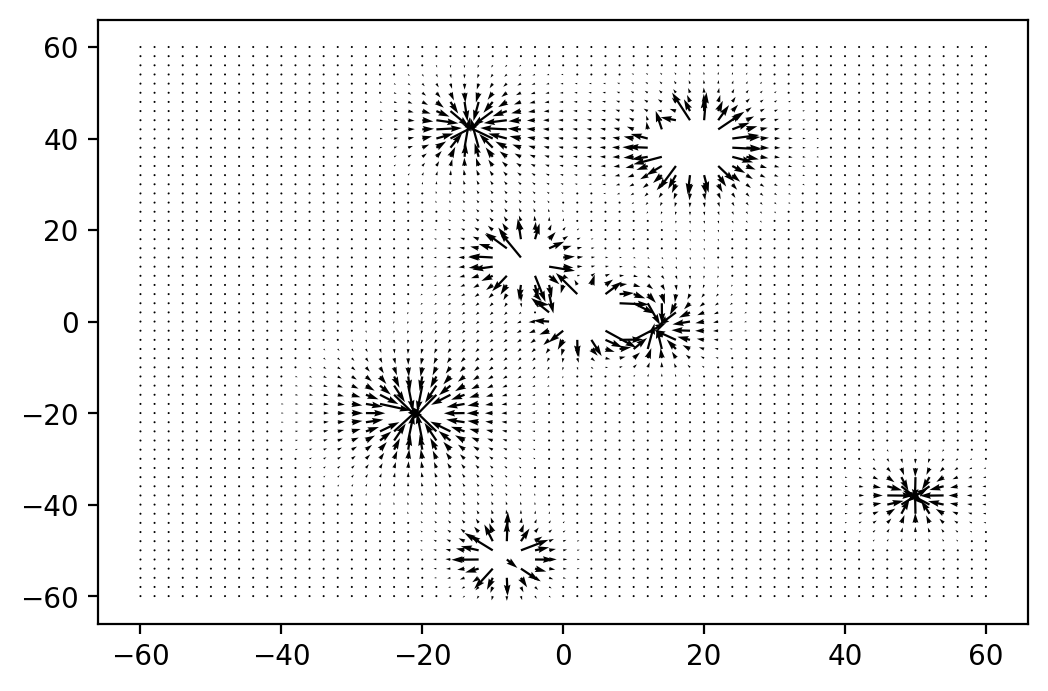

In [266]:
# Now plot the (Ex, Ey) vector field!
# This is the "Quiver()" command in matplotlib.pyplot:
bigplot()
p.quiver(x,y,Exx,Eyy, angles='xy', scale = 3)
p.show()

* What direction to the vectors point?  Explain or describe the reason for this in the context of the shape of your 3D plots.

The vectors point away from positive charges and towards negative charge. This makes sense because in the 3d plot, a positive charge is a spike and a negative charge is a trough. This would relate to water flowing due to gravity.

## 5.  Plot a surface plot of the electric potential


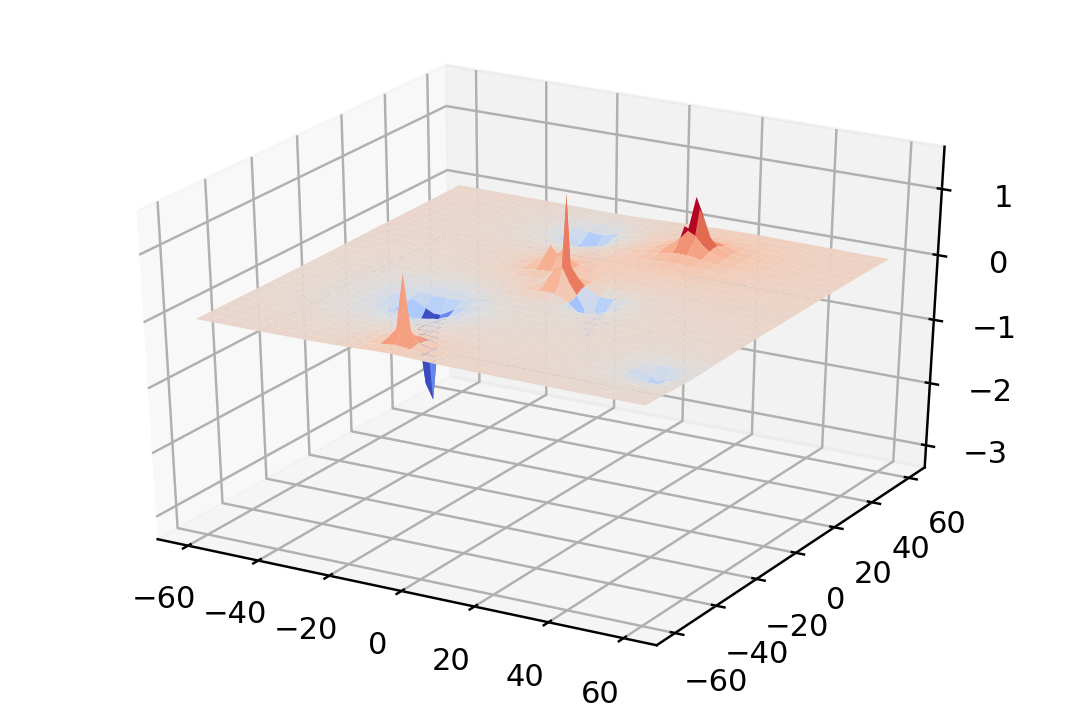

In [267]:
# Plotting a 3D plot is a bit more involved.
 
# Color mapping
from matplotlib import cm

# First we set up a new figure, and we define
# a new 3D axes object upon which the plot will 
# be drawn.
fig = p.figure(dpi = 220)  #Make a new, big figure
ax = fig.gca(projection='3d')

#Plot the surface
surf = ax.plot_surface(x, y, V, cmap=cm.coolwarm, linewidth=0, antialiased=True)


## 6. Questions

* What is the relationship between the direction of electric field vectors and the direction and shape of the potential contours?  There is a very beautiful relationship between the contours and the electric field direction.  You may want to superimpose contour plots and quiver plots to see the two together and investigate.

The electric field is always perpendicular to the equipotential lines of the contour plot.

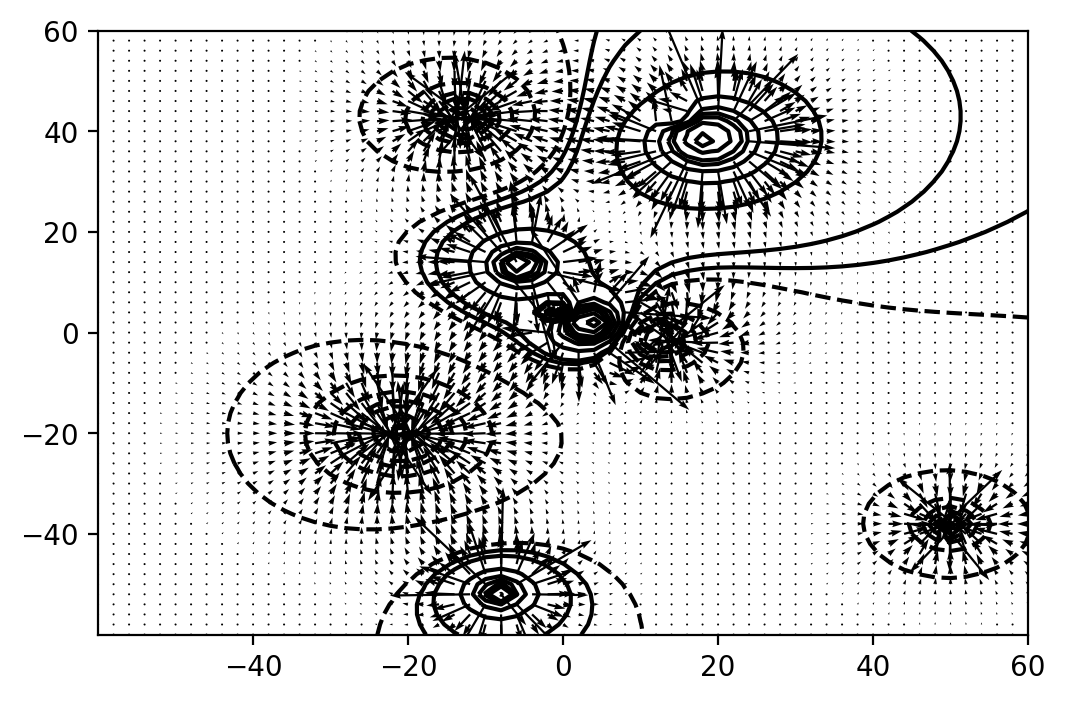

In [268]:
# We can OVERLAY PLOTS TOO!
bigplot()
# Make a contour plot to visualize the scalar field
p.contour(x,y,V,levels, colors="k")
# And a quiver plot shows the vector field we derived from its gradient!!
p.quiver(x,y,Exx,Eyy)

# Show
p.show()

## 7. Plot cross sections through your potential

Your electric potential is represented as a matrix of values.  Likewise your x and y coordinate matrices are simply repeated rows or columns of the x and y positions at each coordinate point (and the computer uses these to do calculations).

If you type x[:,0]  you will get the first row in your x coordinate grid, which is simply a list of the x coordinates.

If you type V[0] what do you get?  

Think of how you will create a simple plot  (viz, p.plot( ...) ) cross section through your potential field.  Then do a for loop and create a plot of many cross sections through your field, all on the same graph.  You should see some rather excellent curves show up.  

Your instructors will be around to assist as you run into snags.

V[0] returns the electric potential of every point in row 0.

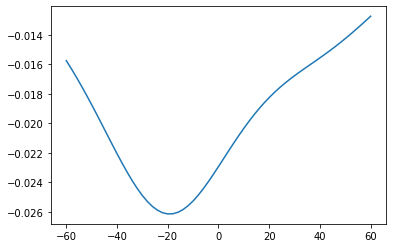

In [269]:
p.plot(x[:,0],V[0])

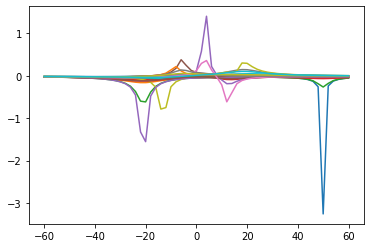

In [270]:
# Cross section plots holding x constant
for i in range(-50,50,5):
    p.plot(y[i],V[:,i])

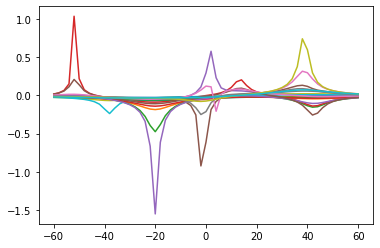

In [271]:
# Cross section plot holding y constant
for i in range(-50,50,5):
    p.plot(x[:,i],V[i])